In [2]:
import numpy as np
import numpy.random as rand
import math
import time
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# The one-dimensional methods of exhaustive search, dichotomy and golden section search to find an approximate solution

In [3]:
#exhaustive search
def exsearch(a, b, eps, f):
    n = math.ceil((b-a)/eps)
    xmin = a
    fmin = f(xmin)
    for k in range(1, n + 1):
        xk = a + k*(b-a)/n 
        fk = f(xk)
        if fk<fmin:
            xmin = xk
            fmin = fk
    return xmin, n, n

#dichotomy method
def dichsearch (a, b, eps, f):
    delta = eps/2
    iter = 0
    xmin = 0
    while math.fabs(a-b)>=eps:
        iter = iter+1
        x1 = (a+b-delta)/2
        x2 = (a+b+delta)/2


        if f(x1)<=f(x2):
            b = x2
        else:
            a = x1

    if (f(a)<=f(b)):
        xmin = a
    else:
        xmin = b

    return xmin, iter*2, iter

#golden section method
def goldsecsearch (a, b, eps, f):
    iter = 0
    xmin = 0
    x1 = a+(3-5**0.5)*(b-a)/2
    x2 = b+(5**0.5-3)*(b-a)/2
    f1 = f(x1)
    f2 = f(x2)
    while math.fabs(a-b)>=eps:
        iter = iter+1
        if f1<=f2:
            b = x2
            x2 = x1
            f2 = f1
            x1 = a+(3-5**0.5)*(b-a)/2
            f1 = f(x1)
        else:
            a = x1
            x1 = x2
            f1 = f2
            x2 = b+(5**0.5-3)*(b-a)/2
            f2 = f(x2)

    if (f(a)<=f(b)):
        xmin = a
    else:
        xmin = b

    return xmin, iter+2, iter


# Given functions 

In [4]:
def funcpower3(x):
    return x*x*x
def funcabs(x):
    return math.fabs(x-0.2)
def funcsin(x):
    return x*math.sin(1/x)

# Graphical representation of given functions

<ipython-input-5-dec5fe240471>:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname = "D:/Магистр/Algorithms/graph_2lab_task1.png", dpi=300, facecolor='w', edgecolor='w',
<ipython-input-5-dec5fe240471>:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname = "D:/Магистр/Algorithms/graph_2lab_task1.png", dpi=300, facecolor='w', edgecolor='w',


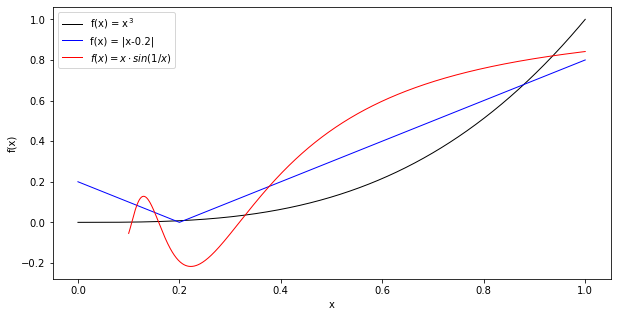

In [5]:
x1 = np.arange(0, 1.001, 0.001)

x2 = np.arange(0, 1.001, 0.001)
f2 = np.vectorize(funcabs)

x3 = np.arange(0.1, 1.001, 0.001)
f3 = np.vectorize(funcsin)

plt.figure(figsize=(10,5))
plt.plot(x1,funcpower3(x1),'', color = 'black', linewidth=1, label="f(x) = x$^3$")
plt.plot(x2,f2(x2),'', color = 'blue', linewidth=1, label="f(x) = |x-0.2|")
plt.plot(x3,f3(x3),'', color = 'red', linewidth=1, label='$f(x) = x \cdot sin(1/x) $')

plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.savefig(fname = "D:/Магистр/Algorithms/graph_2lab_task1.png", dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None, 
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)

# Calculation results

In [20]:
xmin_ex_1, countf_ex_1, iter_ex_1 = exsearch(0, 1, 0.001, funcpower3)
xmin_dich_1, countf_dich_1, iter_dich_1 = dichsearch(0, 1, 0.001, funcpower3)
xmin_gold_1, countf_gold_1, iter_gold_1 = goldsecsearch(0, 1, 0.001, funcpower3)

xmin_ex_2, countf_ex_2, iter_ex_2 = exsearch(0, 1, 0.001, funcabs)
xmin_dich_2, countf_dich_2, iter_dich_2 = dichsearch(0, 1, 0.001, funcabs)
xmin_gold_2, countf_gold_2, iter_gold_2 = goldsecsearch(0, 1, 0.001, funcabs)

xmin_ex_3, countf_ex_3, iter_ex_3 = exsearch(0.01, 1, 0.001, funcsin)
xmin_dich_3, countf_dich_3, iter_dich_3 = dichsearch(0.01, 1, 0.001, funcsin)
xmin_gold_3, countf_gold_3, iter_gold_3 = goldsecsearch(0.01, 1, 0.001, funcsin)

from prettytable import PrettyTable
th = ['Function', 'Domain', 'Method', 'x minimum', 'f(x mininmum)', 'number of f-calculations', 'number of iterations' ]
td = ['x^3', '[0,1]', 'Exhaustive search', '%.3f' % xmin_ex_1, '%.3f' % funcpower3(xmin_ex_1), countf_ex_1, iter_ex_1,
      'x^3', '[0,1]', 'Dichotomy', '%.3f' % xmin_dich_1, '%.3f' % funcpower3(xmin_dich_1), countf_dich_1, iter_dich_1,
      'x^3', '[0,1]', 'Golden section', '%.3f' % xmin_gold_1, '%.3f' % funcpower3(xmin_gold_1), countf_gold_1, iter_gold_1,
      '', '', '', '', '', '', '',
      '|x-0.2|', '[0,1]', 'Exhaustive search', '%.3f' % xmin_ex_2, '%.3f' % funcabs(xmin_ex_2), countf_ex_2, iter_ex_2,
      '|x-0.2|', '[0,1]', 'Dichotomy', '%.3f' % xmin_dich_2, '%.3f' % funcabs(xmin_dich_2), countf_dich_2, iter_dich_2,
      '|x-0.2|', '[0,1]', 'Golden section', '%.3f' % xmin_gold_2, '%.3f' % funcabs(xmin_gold_2), countf_gold_2, iter_gold_2,
      '', '', '', '', '', '','',
      'xsin(1/x)', '[0.01,1]', 'Exhaustive search', '%.3f' % xmin_ex_3, '%.3f' % funcsin(xmin_ex_3), countf_ex_3, iter_ex_3,
      'xsin(1/x)', '[0.01,1]', 'Dichotomy', '%.3f' % xmin_dich_3,  '%.3f' % funcsin(xmin_dich_3), countf_dich_3, iter_dich_3,
      'xsin(1/x)', '[0.01,1]', 'Golden section', '%.3f' % xmin_gold_3, '%.3f' % funcsin(xmin_gold_3),  countf_gold_3, iter_gold_3]

columns = len(th)
table = PrettyTable(th)
td_data = td[:]

while td_data:
    table.add_row(td_data[:columns])
    td_data = td_data[columns:]

print(table) 

+-----------+----------+-------------------+-----------+---------------+--------------------------+----------------------+
|  Function |  Domain  |       Method      | x minimum | f(x mininmum) | number of f-calculations | number of iterations |
+-----------+----------+-------------------+-----------+---------------+--------------------------+----------------------+
|    x^3    |  [0,1]   | Exhaustive search |   0.000   |     0.000     |           1000           |         1000         |
|    x^3    |  [0,1]   |     Dichotomy     |   0.000   |     0.000     |            22            |          11          |
|    x^3    |  [0,1]   |   Golden section  |   0.000   |     0.000     |            17            |          15          |
|           |          |                   |           |               |                          |                      |
|  |x-0.2|  |  [0,1]   | Exhaustive search |   0.200   |     0.000     |           1000           |         1000         |
|  |x-0.2|  |  [

# Linear and rational functions and  numerical minimization functions for the method of least squares

In [8]:
def funclin(a,b,x):
    return a*x+b
def funcrat(a,b,x):
    return a/(1+b*x)


def funcmls(f,y):
    return (f-y)**2


# Methods of exhaustive search, Gauss and Nelder-Mead for solve the minimization problem

In [9]:
#exhaustive search for method  of least squares
def exsearchmls(x, y, a_from, a_to, b_from, b_to, eps, f):
    iterf = 0
    amin = a_from
    bmin = b_from
    fmin = sum(funcmls(f(amin,bmin,x),y))
   # print(fmin)
    for a in np.arange(a_from+eps, a_to+eps, eps):
       # print(a)
        for b in np.arange(b_from+eps, b_to+eps, eps):
           # print(b)
            iterf = iterf+1
            fk = sum(funcmls(f(a,b,x),y))
            if fk<fmin:
                fmin = fk
                amin = a
                bmin = b
    return amin, bmin, iterf+1, iterf

#Gauss for method of least squares
def findamin(bfix, a_from, a_to, eps, x, y, f,iterf, iterx):
    amin = a_from
    fmin = sum(funcmls(f(a_from,bfix,x),y))
    iterf = iterf+1
    for a in np.arange(a_from+eps, a_to+eps, eps):
        iterf = iterf+1
        iterx = iterx + 1
        fk = sum(funcmls(f(a,bfix,x),y))
        if fk<fmin:
            fmin = fk
            amin = a
    return amin, fmin, iterf, iterx

def findbmin(afix, b_from, b_to, eps, x, y, f,iterf, iterx):
    fmin = sum(funcmls(f(afix,b_from,x),y))
    iterf = iterf+1
    bmin = b_from
    for b in np.arange(b_from+eps, b_to+eps, eps):
        iterx = iterx + 1
        iterf = iterf+1
        fk = sum(funcmls(f(afix,b,x),y))
        if fk<fmin:
            fmin = fk
            bmin = b
    return bmin, fmin, iterf, iterx

def gaussmls(x, y, a_from, a_to, b_from, b_to, eps, f):
    iterf = 0
    iterx = 0
    flag = 1
    amin = a_from
    bmin = b_from
    fmin_1 = sum(funcmls(f(amin,bmin,x),y))
    iterf = iterf+1
    fmin_0 = fmin_1+2*eps
    
    while math.fabs(fmin_0-fmin_1)>=eps:
        fmin_0 = fmin_1
        if flag == 0:
            bmin, fmin_1, iterf, iterx = findbmin(amin, b_from, b_to, eps, x, y, f,iterf, iterx)
            flag = 1
        else:
            amin, fmin_1, iterf, iterx = findamin(bmin, a_from, a_to, eps, x, y, f,iterf, iterx)
            flag = 0
    return amin, bmin, iterf, iterx

#Nelder-Mead for method of least squares
def neldermls(x, y, a_from, a_to, b_from, b_to, eps, f):
    iterf = 0
    iterx = 0
    koef_alfa = 1
    koef_betta = 0.5
    koef_gamma = 2
    
    dtype = [('a', float), ('b', float), ('f', float)]
    matrix_simplex = np.array([(a_from, b_from, sum(funcmls(f(a_from, b_from,x),y))),
    (a_from+eps, b_from, sum(funcmls(f(a_to, b_from,x),y))),
    (a_from, b_from+eps, sum(funcmls(f(a_from, b_to,x),y)))], dtype=dtype)
    f_only = np.array([matrix_simplex[0][2], matrix_simplex[1][2], matrix_simplex[2][2]])
    matrix_simplex.sort(order='f')
    iterf = iterf+3
    
    while (np.var(f_only)>=eps):
        
        iterx = iterx+1
        matrix_simplex_copy = matrix_simplex
        xc_a = (matrix_simplex[0][0] + matrix_simplex[1][0])/2
        xc_b = (matrix_simplex[0][1] + matrix_simplex[1][1])/2

        xr_a = (1+koef_alfa)*xc_a - koef_alfa*matrix_simplex[2][0]
        xr_b = (1+koef_alfa)*xc_b - koef_alfa*matrix_simplex[2][1]
        fr =  sum(funcmls(f(xr_a, xr_b,x),y))
        iterf = iterf+1

        if fr<=matrix_simplex[0][2]:
            xe_a = (1-koef_gamma)*xc_a + koef_gamma*xr_a
            xe_b = (1-koef_gamma)*xc_b + koef_gamma*xr_b
            fe =  sum(funcmls(f(xe_a, xe_b,x),y))
            iterf = iterf+1

            if fe<fr:
                matrix_simplex[2][0]=xe_a
                matrix_simplex[2][1]=xe_b
                matrix_simplex[2][2]=fe
                #шаг 7
            else:
                matrix_simplex[2][0]=xr_a
                matrix_simplex[2][1]=xr_b
                matrix_simplex[2][2]=fr
                #шаг 7
        else:
            if fr<=matrix_simplex[1][2]:
                matrix_simplex[2][0]=xr_a
                matrix_simplex[2][1]=xr_b
                matrix_simplex[2][2]=fr
                #шаг 7
            else:
                if fr<=matrix_simplex[2][2]:
                    local_a = matrix_simplex[2][0]
                    local_b = matrix_simplex[2][1]
                    local_f = matrix_simplex[2][2]
                    matrix_simplex[2][0]=xr_a
                    matrix_simplex[2][1]=xr_b
                    matrix_simplex[2][2]=fr
                    xr_a = local_a
                    xr_b = local_b
                    fr = local_f
                    
                    xs_a = koef_betta*matrix_simplex[2][0]+(1-koef_betta)*xc_a
                    xs_b = koef_betta*matrix_simplex[2][1]+(1-koef_betta)*xc_b
                    fs = sum(funcmls(f(xs_a, xs_b,x),y))
                    iterf = iterf+1

                    if fs<matrix_simplex[2][2]:
                        matrix_simplex[2][0]=xs_a
                        matrix_simplex[2][1]=xs_b
                        matrix_simplex[2][2]=fs
                        #шаг 7
                    else:
                        matrix_simplex[1][0]=matrix_simplex_copy[0][0]+(matrix_simplex_copy[1][0]-matrix_simplex_copy[0][0])/2
                        matrix_simplex[1][1]=matrix_simplex_copy[0][1]+(matrix_simplex_copy[1][1]-matrix_simplex_copy[0][1])/2
                        matrix_simplex[1][2]=sum(funcmls(f( matrix_simplex_copy[1][0], matrix_simplex_copy[1][1],x),y))
                        iterf = iterf+1

                        matrix_simplex[2][0]=matrix_simplex_copy[0][0]+(matrix_simplex_copy[2][0]-matrix_simplex_copy[0][0])/2
                        matrix_simplex[2][1]=matrix_simplex_copy[0][2]+(matrix_simplex_copy[2][1]-matrix_simplex_copy[0][2])/2
                        matrix_simplex[2][2]=sum(funcmls(f( matrix_simplex_copy[2][0], matrix_simplex_copy[2][1],x),y))
                        iterf = iterf+1
                        #шаг 7

                else:
                        xs_a = koef_betta*matrix_simplex[2][0]+(1-koef_betta)*xc_a
                        xs_b = koef_betta*matrix_simplex[2][1]+(1-koef_betta)*xc_b
                        fs = sum(funcmls(f(xs_a, xs_b,x),y))
                        iterf = iterf+1

                        if fs<matrix_simplex[2][2]:
                            matrix_simplex[2][0]=xs_a
                            matrix_simplex[2][1]=xs_b
                            matrix_simplex[2][2]=fs
                            #шаг 7
                        else:
                            matrix_simplex[1][0]=matrix_simplex_copy[0][0]+(matrix_simplex_copy[1][0]-matrix_simplex_copy[0][0])/2
                            matrix_simplex[1][1]=matrix_simplex_copy[0][1]+(matrix_simplex_copy[1][1]-matrix_simplex_copy[0][1])/2
                            matrix_simplex[1][2]=sum(funcmls(f( matrix_simplex_copy[1][0], matrix_simplex_copy[1][1],x),y))
                            iterf = iterf+1

                            matrix_simplex[2][0]=matrix_simplex_copy[0][0]+(matrix_simplex_copy[2][0]-matrix_simplex_copy[0][0])/2
                            matrix_simplex[2][1]=matrix_simplex_copy[0][2]+(matrix_simplex_copy[2][1]-matrix_simplex_copy[0][2])/2
                            matrix_simplex[2][2]=sum(funcmls(f( matrix_simplex_copy[2][0], matrix_simplex_copy[2][1],x),y))
                            iterf = iterf+1
                            #шаг 7

        f_only = np.array([matrix_simplex[0][2], matrix_simplex[1][2], matrix_simplex[2][2]])
        matrix_simplex.sort(order='f')


    return  matrix_simplex[0][0], matrix_simplex[0][1], iterf, iterx

# Generate data

In [31]:
from random import random
from random import normalvariate
alfa = random()
betta = random()
k = np.arange (101)
x = k/100
y = np.array(k,dtype='float32')

for k in range(101): 
    delta = normalvariate(0, 1)
    y[k] = alfa*x[k]+betta+delta

print (alfa, betta)

0.615587821804269 0.847681611043706


# Calculation results

In [32]:
alfa_lin_1,betta_lin_1,countf_lin_1,iter_lin_1 = exsearchmls(x,y,0.2,0.8,0.2,0.8,0.001,funclin)
res_lin_1 = sum(funcmls(funclin(alfa_lin_1,betta_lin_1,x),y))
alfa_lin_2,betta_lin_2,countf_lin_2,iter_lin_2 = gaussmls(x,y,0.2,0.8,0.2,0.8,0.001,funclin)
res_lin_2 = sum(funcmls(funclin(alfa_lin_1,betta_lin_2,x),y))
alfa_lin_3,betta_lin_3,countf_lin_3,iter_lin_3 = neldermls(x,y,0.2,0.8,0.2,0.8,0.001,funclin)
res_lin_3 = sum(funcmls(funclin(alfa_lin_3,betta_lin_3,x),y))


alfa_rat_1,betta_rat_1,countf_rat_1,iter_rat_1 = exsearchmls(x,y,0.2,0.8,-0.8,-0.2,0.001,funcrat)
res_rat_1 = sum(funcmls(funcrat(alfa_rat_1,betta_rat_1,x),y))
alfa_rat_2,betta_rat_2,countf_rat_2,iter_rat_2 = gaussmls(x,y,0.2,0.8,-0.8,-0.2,0.001,funcrat)
res_rat_2 = sum(funcmls(funcrat(alfa_rat_2,betta_rat_2,x),y))
alfa_rat_3,betta_rat_3,countf_rat_3,iter_rat_3 = neldermls(x,y,0.2,0.8,-0.8,-0.2,0.001,funcrat)
res_rat_3 = sum(funcmls(funcrat(alfa_rat_3,betta_rat_3,x),y))

from prettytable import PrettyTable
th = ['Function', 'Method', 'a', 'b', 'minimum f', ' number of f-calculations', 'number of iterations' ]
td = ['ax+b', 'Exhaustive search', '%.3f' % alfa_lin_1, '%.3f' % betta_lin_1, '%.3f' % res_lin_1, countf_lin_1, iter_lin_1,
      'ax+b', 'Gauss', '%.3f' % alfa_lin_2, '%.3f' % betta_lin_2, '%.3f' % res_lin_2, countf_lin_2, iter_lin_2,
      'ax+b', 'Nelder-Mead', '%.3f' % alfa_lin_3, '%.3f' % betta_lin_3, '%.3f' % res_lin_3, countf_lin_3, iter_lin_3,
      '', '', '', '', '', '', '',
      'a/(1+bx)', 'Exhaustive search', '%.3f' % alfa_rat_1, '%.3f' % betta_rat_1, '%.3f' % res_rat_1, countf_rat_1, iter_rat_1,
      'a/(1+bx)', 'Gauss', '%.3f' % alfa_rat_2, '%.3f' % betta_rat_2, '%.3f' % res_rat_2, countf_rat_2, iter_rat_2,
      'a/(1+bx)', 'Nelder-Mead', '%.3f' % alfa_rat_3, '%.3f' % betta_rat_3, '%.3f' % res_rat_3, countf_rat_3, iter_rat_3]

columns = len(th)
table = PrettyTable(th)
td_data = td[:]

while td_data:
    table.add_row(td_data[:columns])
    td_data = td_data[columns:]

print(table) 

+----------+-------------------+-------+--------+-----------+---------------------------+----------------------+
| Function |       Method      |   a   |   b    | minimum f |  number of f-calculations | number of iterations |
+----------+-------------------+-------+--------+-----------+---------------------------+----------------------+
|   ax+b   | Exhaustive search | 0.762 | 0.801  |  130.143  |           361202          |        361201        |
|   ax+b   |       Gauss       | 0.774 | 0.796  |  130.146  |            4817           |         4808         |
|   ax+b   |    Nelder-Mead    | 0.200 | 1.069  |  132.813  |             50            |          22          |
|          |                   |       |        |           |                           |                      |
| a/(1+bx) | Exhaustive search | 0.801 | -0.514 |  131.769  |           361202          |        361201        |
| a/(1+bx) |       Gauss       | 0.801 | -0.514 |  131.769  |            7827           |       

# Validation by existing python methods

In [33]:
def lin(x,a,b):
    return a*x + b

popt, _ = curve_fit(lin, x, y)
a_sum, b_sum = popt

print (a_sum, b_sum)
print(sum(funcmls(funclin(a_sum, b_sum,x),y)))

def rat(x,a,b):
    return a/(b*x + 1)
    
popt, _ = curve_fit(rat, x, y)
a_sum, b_sum = popt

print (a_sum, b_sum)
print(sum(funcmls(funcrat(a_sum, b_sum,x),y)))

0.7559899203186642 0.8051263040421464
130.14225370506384
0.9222117517361412 -0.4085851935378404
130.9795287062897


# Results graphs

<ipython-input-34-097a9769297b>:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname = "D:/Магистр/Algorithms/graph_2lab_task2_lin.png", dpi=300, facecolor='w', edgecolor='w',
<ipython-input-34-097a9769297b>:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname = "D:/Магистр/Algorithms/graph_2lab_task2_lin.png", dpi=300, facecolor='w', edgecolor='w',
<ipython-input-34-097a9769297b>:26: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname = "D:/Магистр/Algorithms/graph_2lab_task2_rat.png", dpi=300, facecolor='w', edgecolor='w',
<ipython-input-34-097a9769297b>:26: Matplo

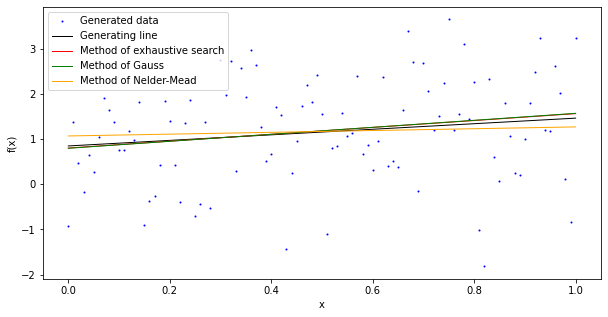

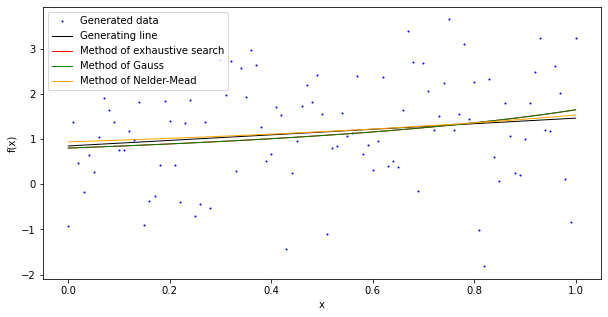

In [34]:
plt.figure(figsize=(10,5))
plt.plot(x, y, 'bo', label='Generated data', markersize=1)
plt.plot(x, funclin(alfa,betta,x),'', color = 'black', linewidth=1, label="Generating line")
plt.plot(x, funclin(alfa_lin_1,betta_lin_1,x),'', color = 'red', linewidth=1, label="Method of exhaustive search")
plt.plot(x, funclin(alfa_lin_2,betta_lin_2,x),'', color = 'green', linewidth=1, label="Method of Gauss")
plt.plot(x, funclin(alfa_lin_3,betta_lin_3,x),'', color = 'orange', linewidth=1, label="Method of Nelder-Mead")

plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.savefig(fname = "D:/Магистр/Algorithms/graph_2lab_task2_lin.png", dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None, 
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)

plt.figure(figsize=(10,5))
plt.plot(x, y, 'bo', label='Generated data', markersize=1)
plt.plot(x, funclin(alfa,betta,x),'', color = 'black', linewidth=1, label="Generating line")
plt.plot(x, funcrat(alfa_rat_1,betta_rat_1,x),'', color = 'red', linewidth=1, label="Method of exhaustive search")
plt.plot(x, funcrat(alfa_rat_2,betta_rat_2,x),'', color = 'green', linewidth=1, label="Method of Gauss")
plt.plot(x, funcrat(alfa_rat_3,betta_rat_3,x),'', color = 'orange', linewidth=1, label="Method of Nelder-Mead")

plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.savefig(fname = "D:/Магистр/Algorithms/graph_2lab_task2_rat.png", dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None, 
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)